# Matplotlib을 활용한 시각화 2

## 히스토그램, 구간화, 밀도
- 데이터세트를 이해하는 가장 좋은 첫걸음은 히스토그램을 그려보는 것이다.

### 1. <U>1차원 히스토그램과 구간화</U>

(array([   6.,   25.,   67.,  155.,  221.,  227.,  152.,  103.,   36.,    8.]),
 array([-3.10566753, -2.50767409, -1.90968065, -1.31168721, -0.71369376,
        -0.11570032,  0.48229312,  1.08028656,  1.67828001,  2.27627345,
         2.87426689]),
 <a list of 10 Patch objects>)

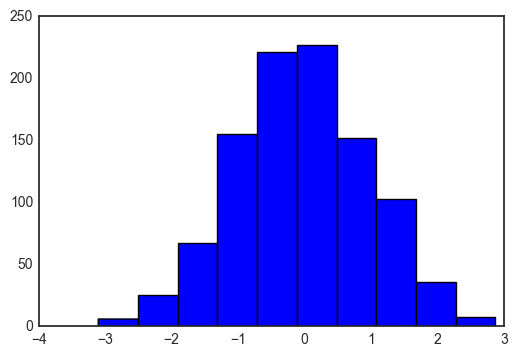

In [1]:
# matplotlib를 사용하기 위하 기본적인 셋팅
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

# plotting 할 데이터를 임의로 선택
data = np.random.randn(1000)

# 히스토그램을 불러온다.
plt.hist(data)

(array([ 0.01505033,  0.01003355,  0.00501678,  0.03010066,  0.04013422,
         0.05518455,  0.09531877,  0.11538588,  0.12541944,  0.22575498,
         0.21572143,  0.33612409,  0.34114086,  0.36120797,  0.40635897,
         0.41639253,  0.35117442,  0.37124153,  0.32609053,  0.23077176,
         0.20568787,  0.19063754,  0.19063754,  0.13545299,  0.07525166,
         0.06020133,  0.045151  ,  0.01505033,  0.01505033,  0.01003355]),
 array([-3.10566753, -2.90633639, -2.70700524, -2.50767409, -2.30834294,
        -2.1090118 , -1.90968065, -1.7103495 , -1.51101835, -1.31168721,
        -1.11235606, -0.91302491, -0.71369376, -0.51436262, -0.31503147,
        -0.11570032,  0.08363083,  0.28296197,  0.48229312,  0.68162427,
         0.88095542,  1.08028656,  1.27961771,  1.47894886,  1.67828001,
         1.87761115,  2.0769423 ,  2.27627345,  2.4756046 ,  2.67493574,
         2.87426689]),
 <a list of 1 Patch objects>)

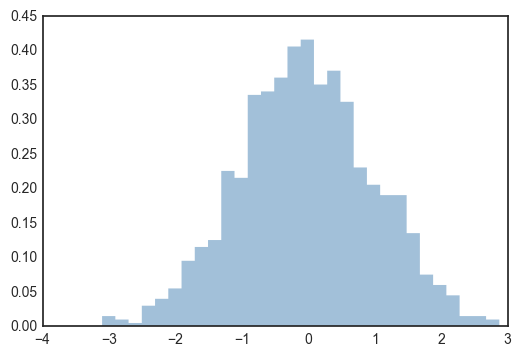

In [2]:
plt.hist(data, bins=30, normed=True, alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none')

- 다양한 분포에 대한 히스토그램을 비교하고자 할 때는 `histtype='stepfilled'`와 투명도 `alpha`를 결합한다.

(array([ 0.00298899,  0.        ,  0.00298899,  0.00597799,  0.00597799,
         0.00298899,  0.00597799,  0.02391195,  0.02092295,  0.02690094,
         0.04184591,  0.06575785,  0.08070282,  0.11657074,  0.10461476,
         0.14347167,  0.19428456,  0.17336161,  0.17933959,  0.22417449,
         0.18531758,  0.19129557,  0.18232859,  0.17037261,  0.13749369,
         0.14347167,  0.11358174,  0.1345047 ,  0.07771382,  0.06276886,
         0.07472483,  0.03586792,  0.00896698,  0.01494497,  0.01195597,
         0.01195597,  0.00597799,  0.        ,  0.        ,  0.00298899]),
 array([-3.84445638, -3.50989557, -3.17533475, -2.84077394, -2.50621313,
        -2.17165232, -1.83709151, -1.5025307 , -1.16796988, -0.83340907,
        -0.49884826, -0.16428745,  0.17027336,  0.50483417,  0.83939499,
         1.1739558 ,  1.50851661,  1.84307742,  2.17763823,  2.51219904,
         2.84675986,  3.18132067,  3.51588148,  3.85044229,  4.1850031 ,
         4.51956391,  4.85412473,  5.18868554,  5

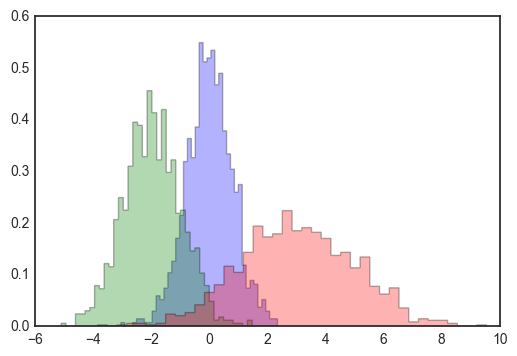

In [3]:
# 정규 분포 3개를 가지고 온다.
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

# hist 함수의 입력 인수를 넣을 때, dictionary 형태로 넣을 수 있다.
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

# 3개의 서로다른 분포를 하나의 plot에서 보자.
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

In [4]:
# 히스토그램의 값만 가지고 오고 싶을 때
counts, bin_edges = np.histogram(data, bins=5)

print counts
print bin_edges

[ 31 222 448 255  44]
[-3.10566753 -1.90968065 -0.71369376  0.48229312  1.67828001  2.87426689]


### 2. <U>2차원 히스토그램과 구간화</U>
- 점을 2차원 구간에 나누어 2차원에서도 히스토그램을 만들 수 있다.

In [5]:
# 다변량 가우스분포를 먼저 만들자.
mean = [0, 0]
cov = [[1, 1], [1, 2]]

x, y = np.random.multivariate_normal(mean, cov, 10000).T

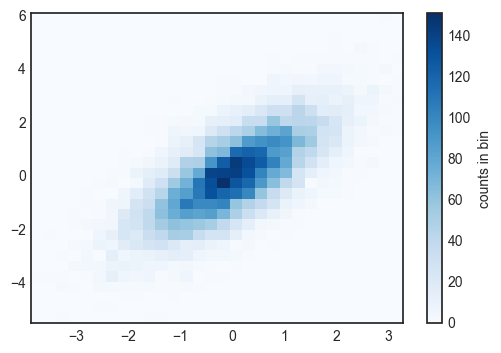

In [6]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [7]:
# 그림이 아닌 히스토그램 값만 얻고 싶을 때
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

print counts
print xedges
print yedges

[[   0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    1.    0.    0.    0.    1.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.]
 [   1.    0.    0.    2.    1.    0.    1.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    1.    0.    3.    0.    2.    0.    1.    1.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    1.    4.    4.    3.    0.    3.    0.    1.
     1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.]
 [   0.    1.    0.    3.    4.    4.    1.    9.    7.    4.    

> plt.hexbin : 육간형 구간화

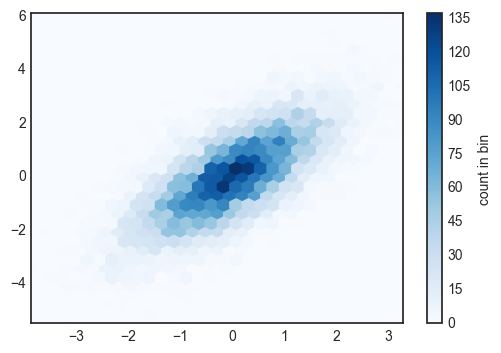

In [8]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

## 플롯 범례 변경하기

### <U>1. 단일 플롯 범례를 변경해보기</U>

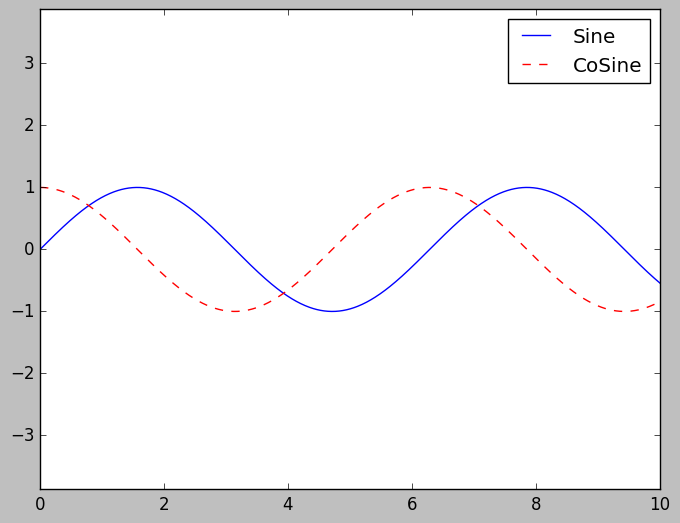

In [25]:
plt.style.use('classic')

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()

# 플롯 요소에 레이블을 할당한다.
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='CoSine')

# x, y가 동일한 scale
ax.axis('equal')
leg = ax.legend()

fig

- 범례를 변경할 수 있다.

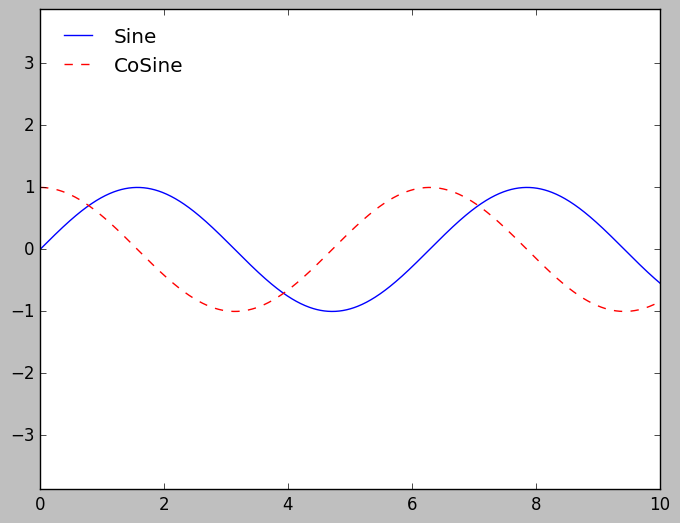

In [27]:
# 범례의 위치를 변경하고, 경계선을 없앤다.
ax.legend(loc='upper left', frameon=False)

fig

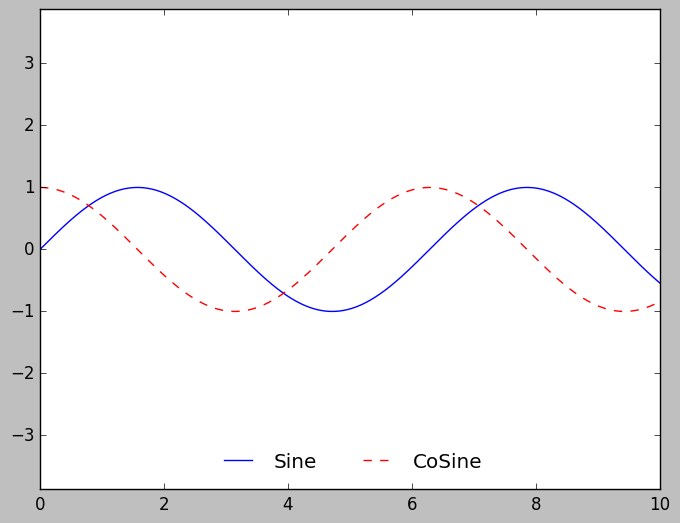

In [29]:
# 범례에 사용되는 열의 개수를 지정할 수 있다.
ax.legend(frameon=False, loc='lower center', ncol=2)

fig

### <U>2. 다중 범례</U>
- 플롯을 디자인할 때 동일한 축에 여러 범례를 추가하고 싶을 때가 있다.
- 표준 `legend` 인터페이스를 통해서는 전체 플롯에 하나의 범례만 만들 수 있다. 따라서 새로운 범례 아티스트를 처음부터 만들고 나서 하위 수준의 `ax.add_artist()` 메서드를 사용해 두 번째 아티스트를 플롯에 직접 추가하는 방식으로 해야 한다.

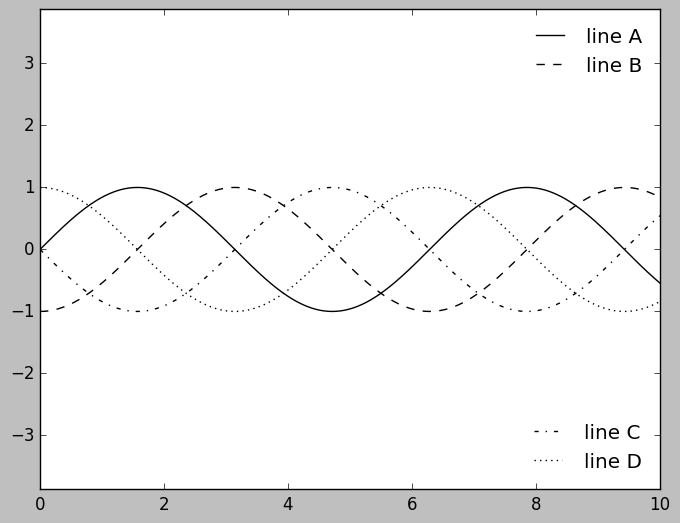

In [35]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')
    
ax.axis('equal')

# 첫 번째 범례의 라인과 레이블을 지정
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right', frameon=False)

# 두 번째 범례를 만들고 직접 아티스트를 추가
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right', frameon=False)

ax.add_artist(leg)

## 다중 서브플롯
- Sub plot : 하나의 그림 내에 공존할 수 있는 더 작은 축의 그룹을 말한다.

In [36]:
plt.style.use('seaborn-white')

### <U>1. `plt.axes`: 직접 만든 sub plot</U>
- 축을 생성하는 가장 기본적인 방법
- 전체 그림을 채우는 표준 축 객체를 생성

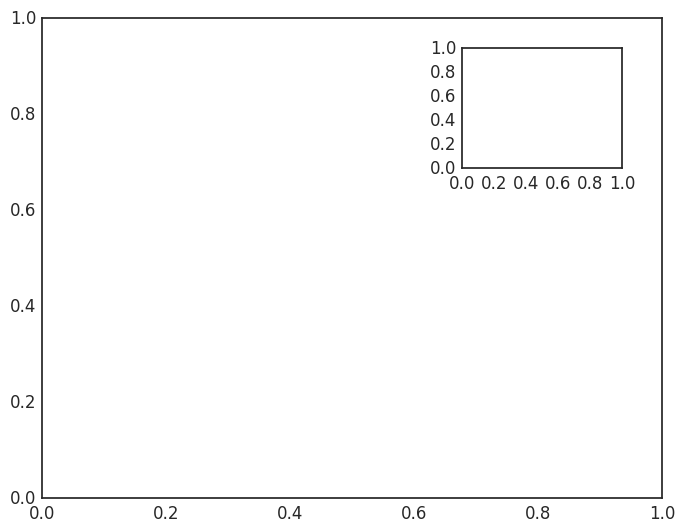

In [40]:
"""x와 y의 위치를 0.65로 설정하고 (즉, 그림 너비의 65%와 높이의 65%에서 시작함을 의미) 
x와 y의 범위를 0.2로 설정해서 (즉, 축의 크기는 그림 너비와 높이의 각 20%가 된다.)
다른 축의 오른쪽 상단 구석에 삽입된 축을 만들 수 있다."""

# 표준 축
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

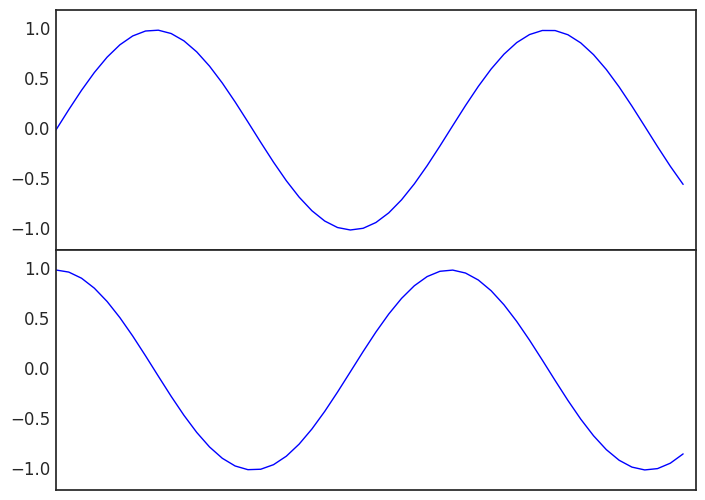

In [50]:
"""두 개의 세로로 배치된 축을 생성"""
fig = plt.figure()

# 리스트의 2번째 원소가 y축의 위치를 나타낸다.
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))

x = np.linspace(0, 10)

ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

### <U>2. `plt.subplot`: 간단한 subplot grid</U>
- 정렬된 서브플롯의 열이나 행은 matplotlib이 그것들을 쉽게 만들 수 있도록 편의 루틴을 몇 가지 제공할 만큼 보편적으로 사용된다.
- 그중 가장 낮은 수준의 루틴은 `plt.subplot()`으로, 그리드 안에 하나의 서브플롯을 만든다.

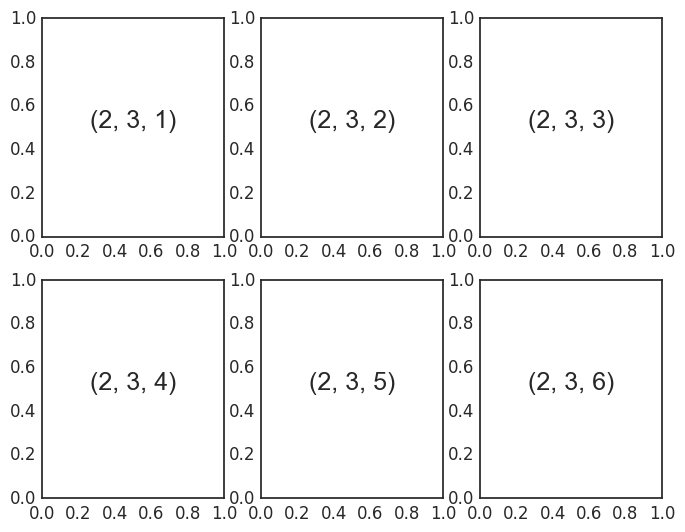

In [54]:
"""간단하게 2 by 3 subplot을 생성해보자."""
for i in range(1, 7):
    # 2 by 3의 subplot (plt.subplot)
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

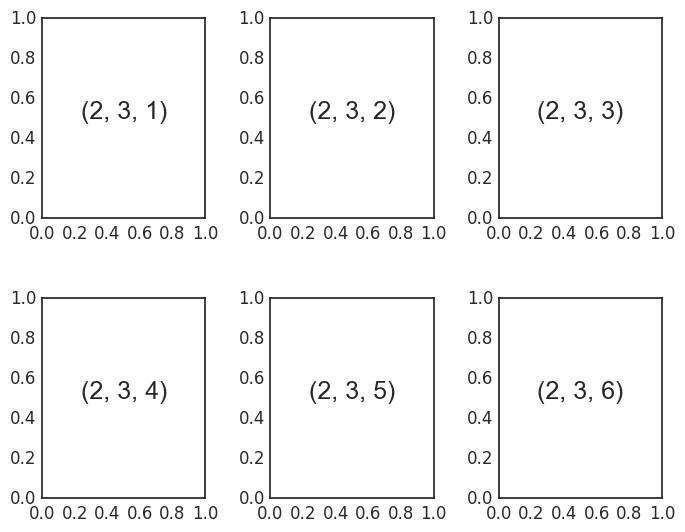

In [62]:
"""sub plot간 간격을 조정"""
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    # 2 by 3의 subplot (fig.add_subplot)
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

### <U>3. `plt.subplots` : 한 번에 전체 그리드 만들기</U>
- 큰 그리드의 서브플롯을 만들 때 사용된다.
- 내부 플롯상의 x축 y축 레이블을 숨기고자 할 때 사용한다.
- 단일 서브플롯을 만들지 않고 전체 그리드의 서브플롯을 한 줄로 만들어 이를 NumPy 배열로 반환한다.

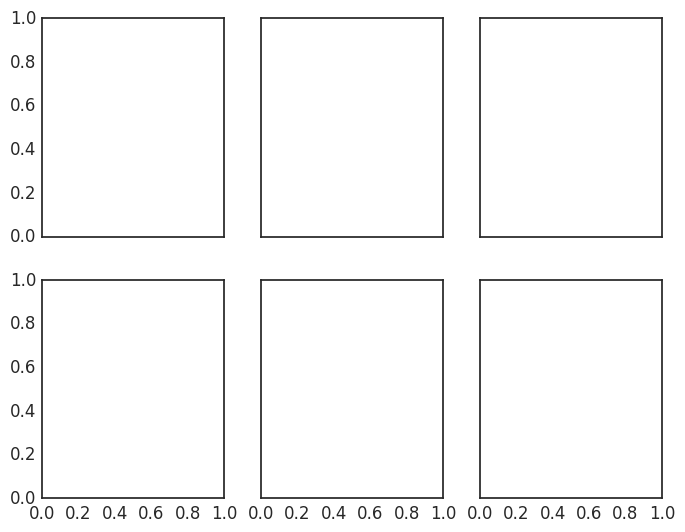

In [55]:
"""같은 행의 모든 축이 y 축의 척도를 공유하고 같은 열의 모든 축은 x 축의 척도를 공유"""
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

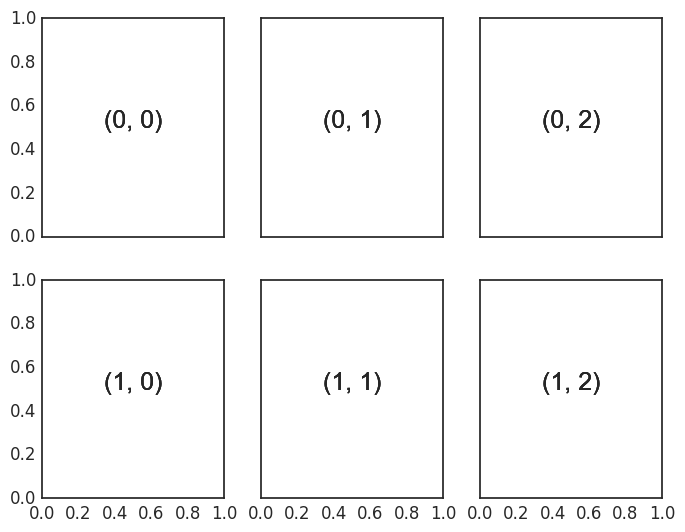

In [58]:
# 결과로 얻은 축 인스턴스의 그리드는 NumPy 배열로 반환된다.

# 축이 2차원 배열 안에 있어 [행, 열]로 인덱싱할 수 있다.
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
        
fig

### <U>4. `plt.GridSpec : 복잡한 배치`</U>
- 서브플롯을 규칙적으로 배치하는 그리드를 넘어 여러 행과 열로 확장하려면 `plt.GridSpec()`을 사용하는 것이 좋다.

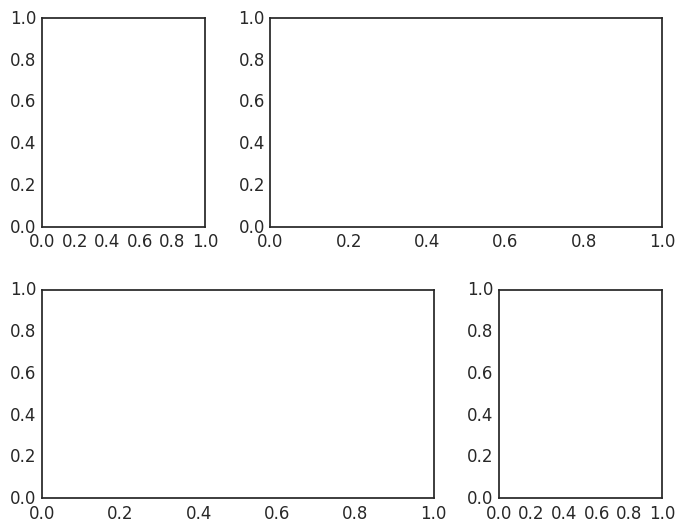

In [64]:
# 너비와 높이 여백을 지정한 두 개의 행과 세 개의 열로 이뤄진 그리드에 대한 gridspec은 다음과 같다.
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

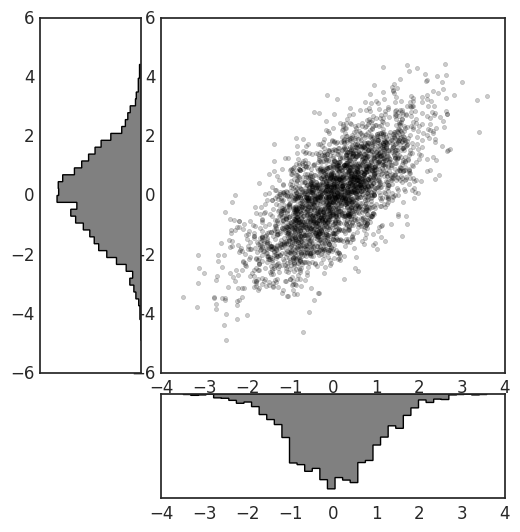

In [70]:
"""다중 축 히스토그램을 만들 때 사용되는 방법"""

# 정규 분포 데이터 만들기
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# gridspec으로 축 설정하기
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# 메인 축에 점 산포하기
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# 보조 축상에 히스토그램 만들기
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()

## 텍스트와 주석

### <U>1. 텍스트</U>

In [71]:
plt.style.use('seaborn-whitegrid')

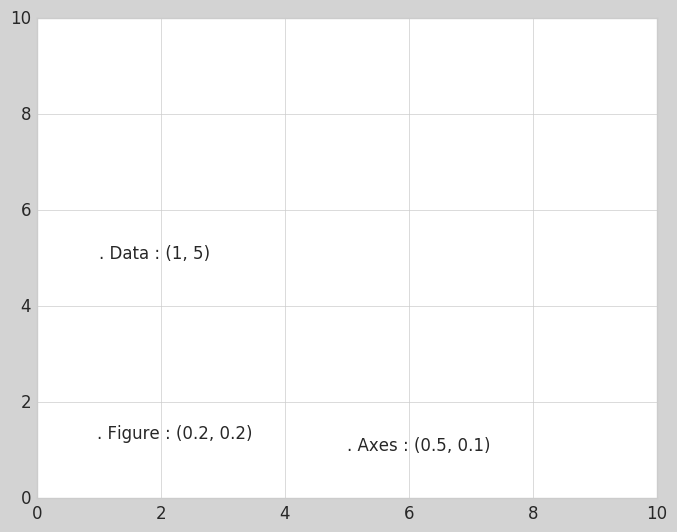

In [73]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

ax.text(1, 5, ". Data : (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes : (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure : (0.2, 0.2)", transform=fig.transFigure)

### <U>2. 화살표와 주석</U>

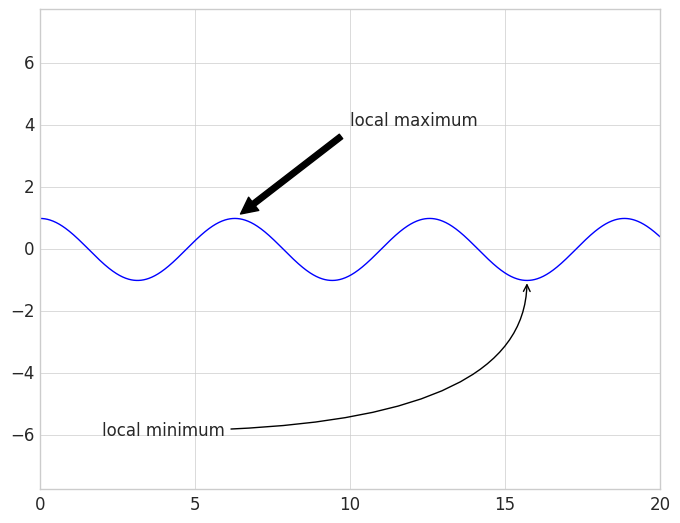

In [78]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4), 
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6), 
            arrowprops=dict(arrowstyle='->', connectionstyle='angle3, angleA=0, angleB=-90'))

## Matplotlib에서 3차원 플로팅하기

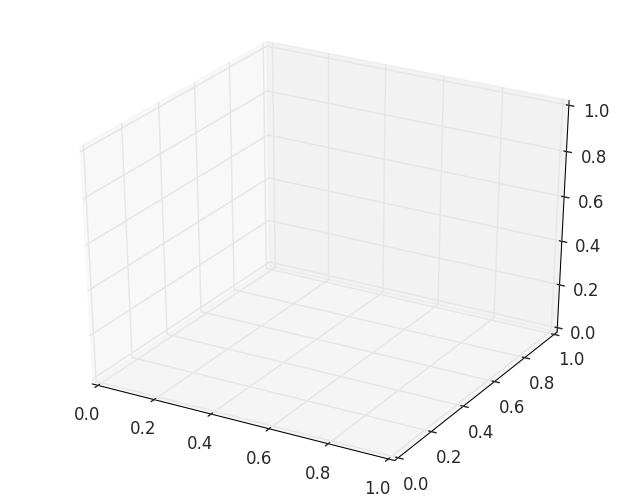

In [80]:
from mpl_toolkits import mplot3d

# 이 서브모듈을 임포트하고 나면 일반 축 생성 루틴에 projection='3d' 키워드를 전달해서 3차원 축을 만들 수 있다.
fig = plt.figure()
ax = plt.axes(projection='3d')

### <U>1. 3차원 점과 선</U>

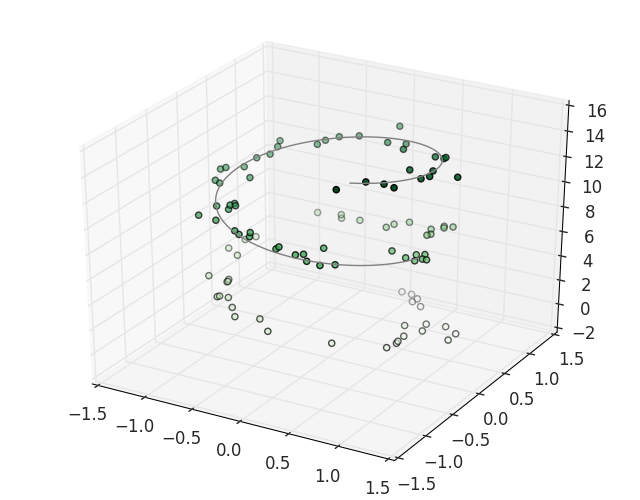

In [85]:
ax = plt.axes(projection='3d')

zline = np.linspace(8, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# 3차원 산점도를 위한 데이터
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

### <U>2. 3차원 등고선 플롯</U>

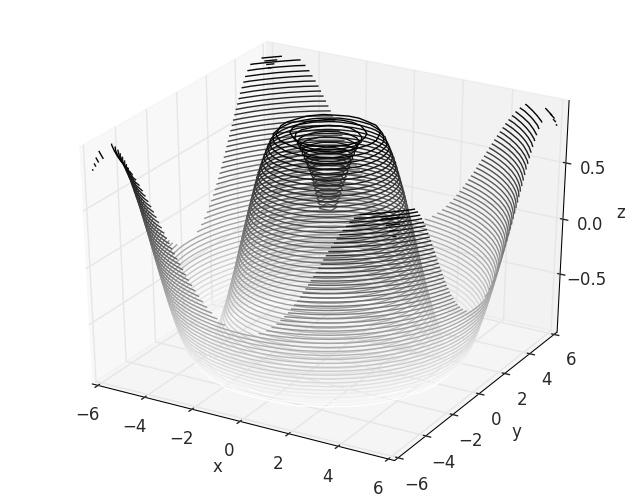

In [86]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

### <U>3. 와이어프레임과 표면도</U>
- 그리드 데이터 상에서 작동하는 3차원 플롯으로 와이어프레임(wireframe)과 표면도가 있다.

> 와이어프레임

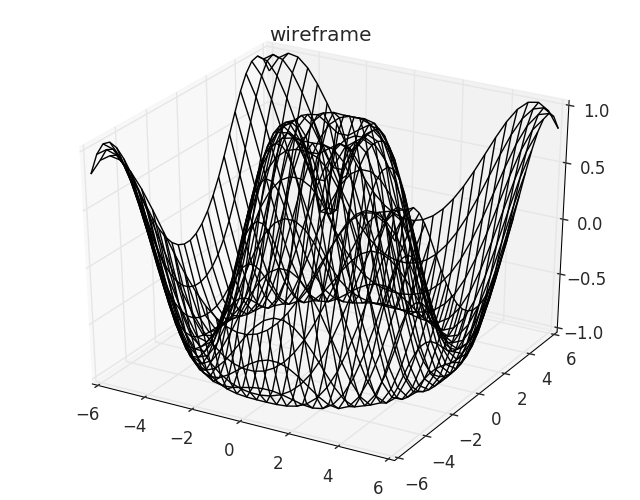

In [87]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe')

> 표면도

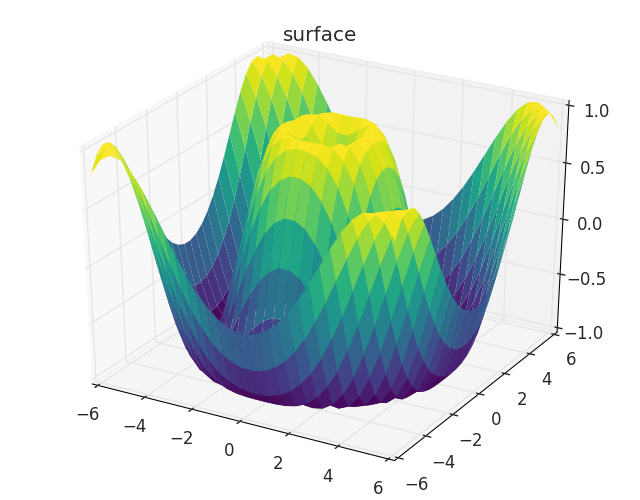

In [88]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface')

## Seaborn을 활용한 시각화
 - Matplotlib의 API는 비교적 수준이 낮아서, 복잡한 통계 시각화를 할 수는 있지만 종종 수많은 상용 코드가 필요함.
 - Matplotlib는 Pandas보다 10년 이상 앞서 개발됐기 때문에 Pandas DataFrame과 함께 사용할 수 있게 설계돼 있지 않음.
 - Pandas DataFrame을 시각화 하려면 각 Series를 추출하고 그것들을 적절한 형태로 연결해야 하는 경우가 많다.

### <U>1. Seaborn vs Matplotlib</U>

> Matplotlib

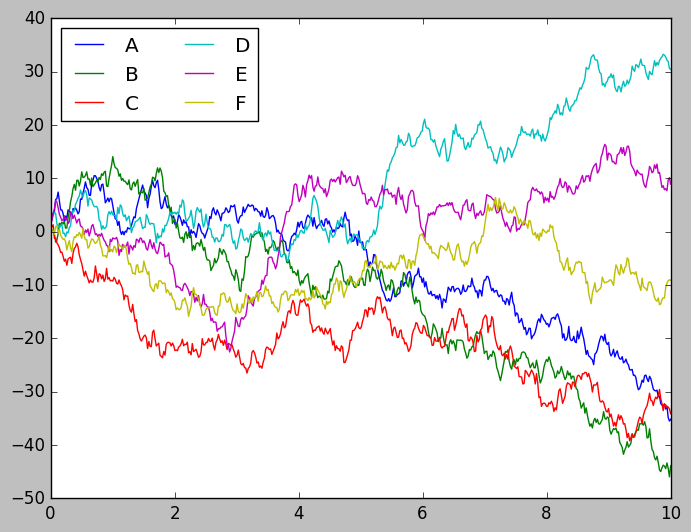

In [89]:
"""Random walk 플롯 생성해보기"""

plt.style.use('classic')

# 데이터 생성
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

# 간단한 플롯 생성
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

> Seaborn

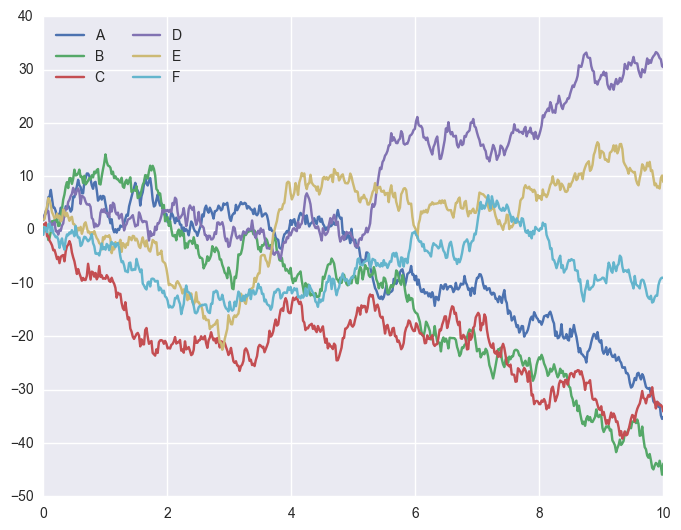

In [90]:
# seaborn 스타일을 설정
import seaborn as sns
sns.set()

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

### <U>2. Seaborn plot</U>
- Seaborn의 주요 목적은 통계 데이터 탐색과 몇 가지 통계 모델 적합에 유용한 다양한 플롯 유형을 생성할 수 있도록 고차원 명령어를 제공

> **히스토그램, KDE, 밀도**

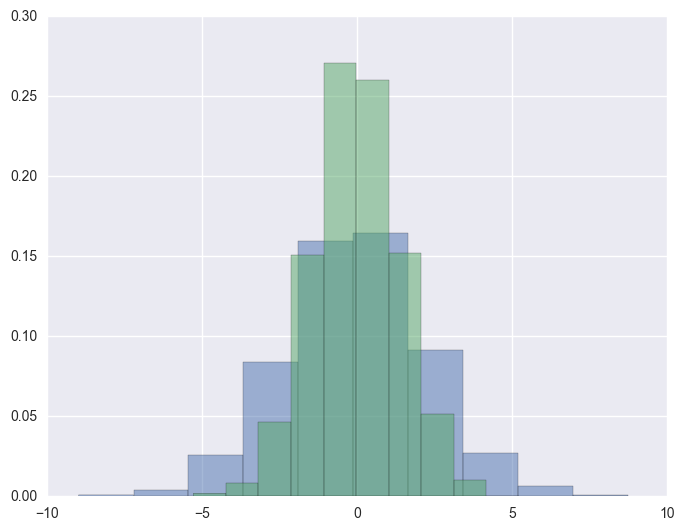

In [91]:
import pandas as pd

data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size = 2000)
data = pd.DataFrame(data, columns=['x', 'y'])
for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

- 히스토그램 대신 Seaborn이 sns.kdeplot으로 하는 커널 밀도 추정을 사용해 분포의 평활 추정을 얻을 수 있다.

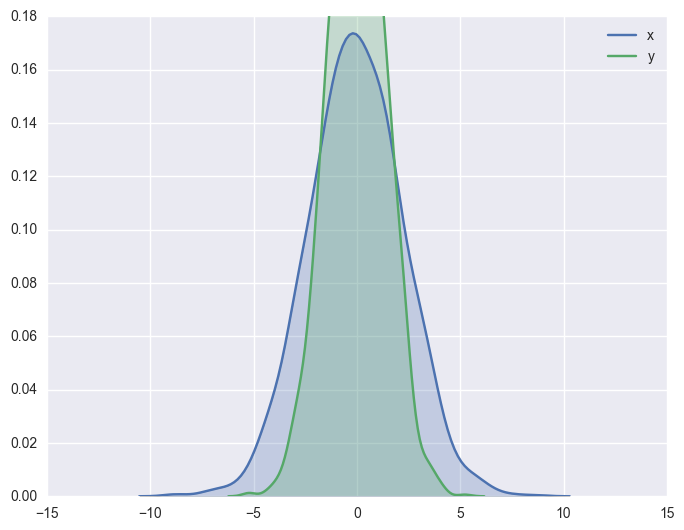

In [92]:
# 커널 밀도 추정 (kernel density estimation)
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

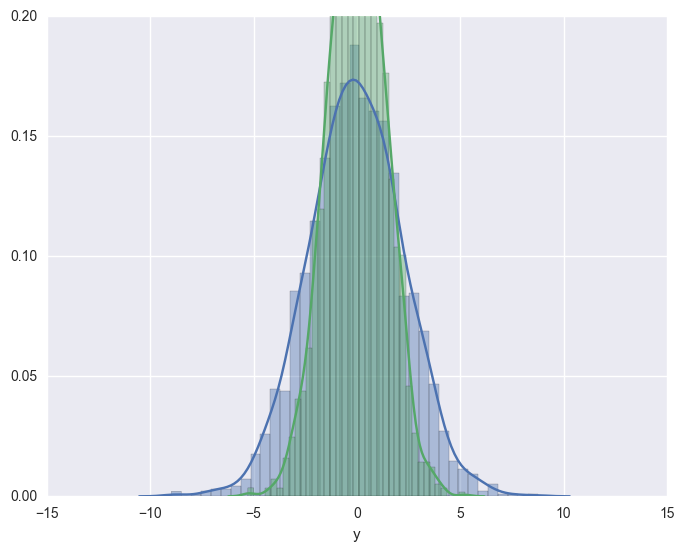

In [93]:
# 히스토그램과 KDE는 distplot을 사용해 결합할 수 있다.

sns.distplot(data['x'])
sns.distplot(data['y'])

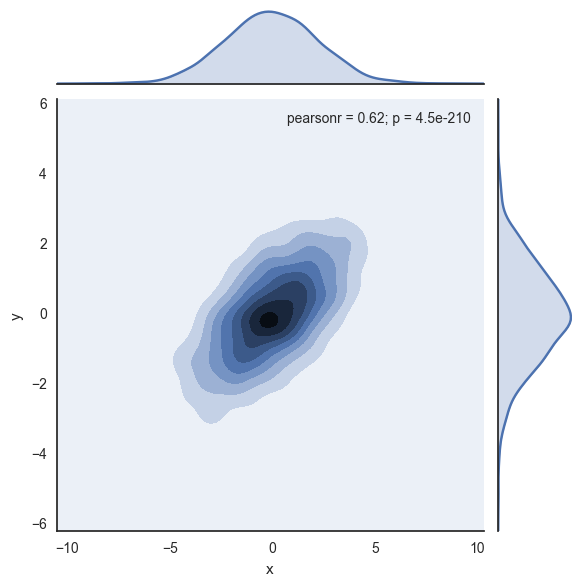

In [96]:
# 결합 분포와 주변 분포를 함께 보기
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='kde')

> **페어 플롯**
- 큰 차원의 데이터세트에 결합 플롯을 일반화할 때 사용
- 다차원 데이터에서 모든 쌍의 값을 서로 플로팅하고자 하는 경우 상관관계를 탐색하기에 매우 유용

In [94]:
# 유명한 iris 데이터 세트를 사용
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


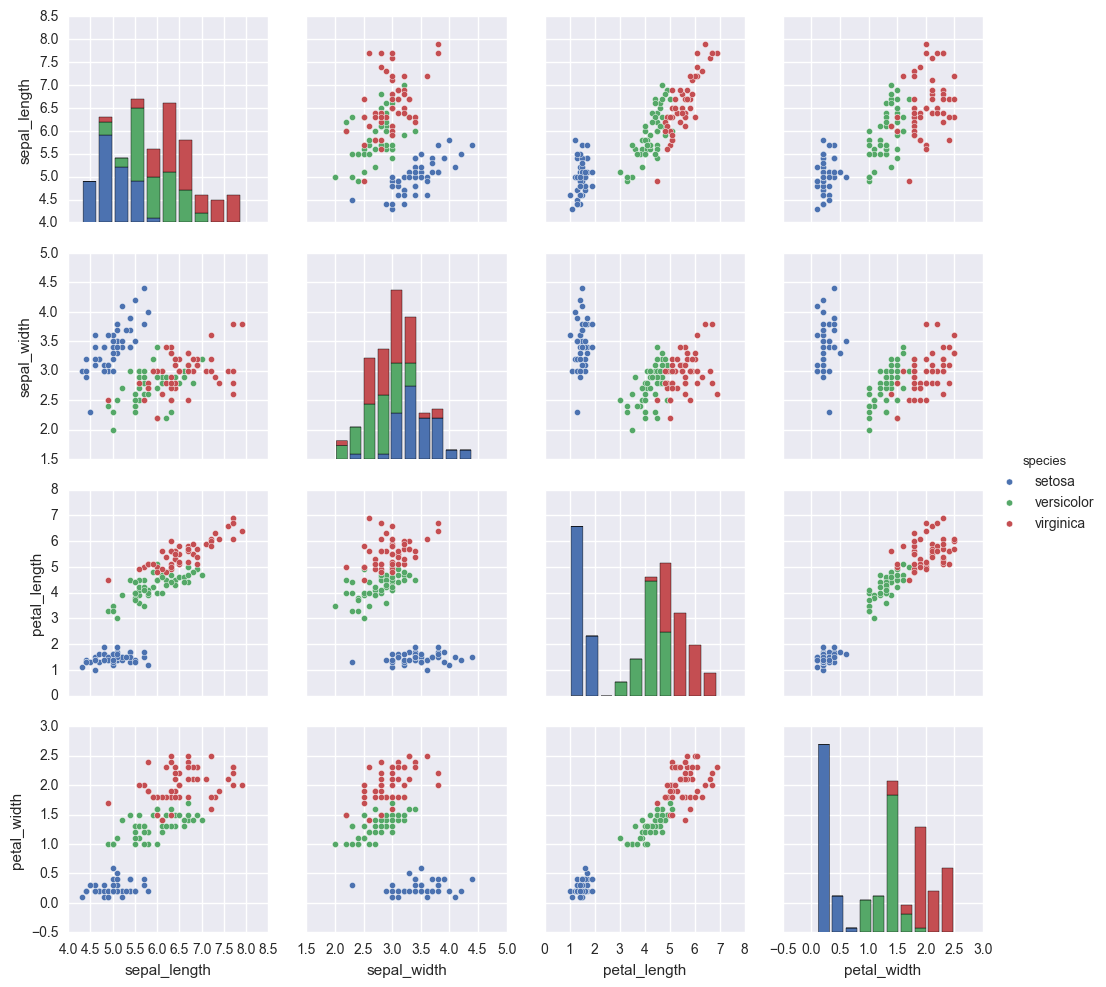

In [95]:
sns.pairplot(iris, hue='species', size=2.5)